In [48]:
import pandas as pd
import numpy as np

**Data Dictionary**
* Survived: 0 = No, 1 = Yes  
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd  
* sibsp: No of siblings - spouses aboard the Titanic  
* parch: No of parents - children aboard the Titanic  
* ticket: Ticket number  
* cabin: Cabin number  
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton  

### Knowing about DataSet

In [171]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [172]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
print("Train Shape:",train.shape)
print("Test Shape:",test.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


In [174]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [175]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [176]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Checking for NaNs or missing values

In [177]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Data Visualizations and Exploratory Data Analysis

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

**Bar Chart for Categorical Features**
* Pclass
* Sex
* SibSp ( No. of siblings and spouse)
* Parch ( No. of parents and children)
* Embarked
* Cabin

In [180]:
flatui = ["#54478c","#2c699a","#048ba8","#0db39e","#16db93","#83e377","#b9e769","#efea5a","#f1c453","#f29e4c"]

def bar_chart_plot(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    notsurvived = train[train['Survived']==0][feature].value_counts()
    plot_df = pd.DataFrame([survived,notsurvived])
    plot_df.index = ['Survived','Not Survived']
    plot_df.plot(kind='bar',stacked=True, figsize=(10,5),color=flatui)
    plt.xticks(rotation=0)
    print("Survived :\n",train[train['Survived']==1][feature].value_counts())
    print("\nNot Survived\n",train[train['Survived']==0][feature].value_counts())

Survived :
 female    233
male      109
Name: Sex, dtype: int64

Not Survived
 male      468
female     81
Name: Sex, dtype: int64


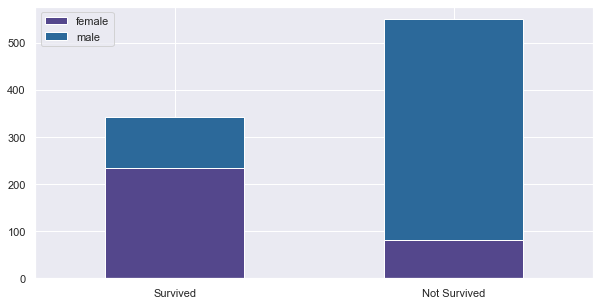

In [181]:
bar_chart_plot('Sex')

**Observation**  
Female more survived than Male.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64

Not Survived
 3    372
2     97
1     80
Name: Pclass, dtype: int64


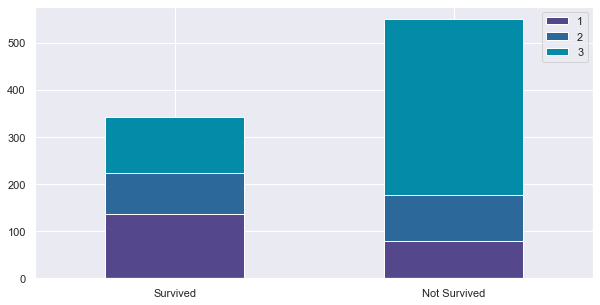

In [182]:
bar_chart_plot('Pclass')

**Observation**  
3rd class passengers most of them fail to survived.

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

Not Survived
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


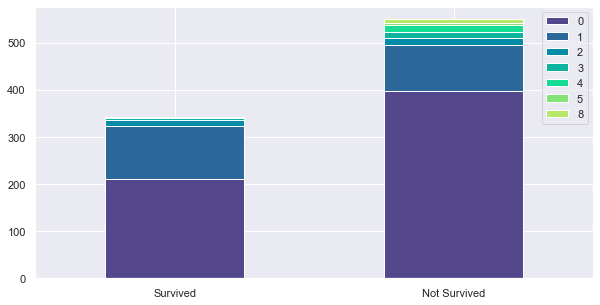

In [183]:
bar_chart_plot('SibSp')

**Observation**   
A passenger who boarded with more than 2 siblings or spouse more likely survived.  
A passenger who boarded without siblings or spouse more likely not survived.

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

Not Survived
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


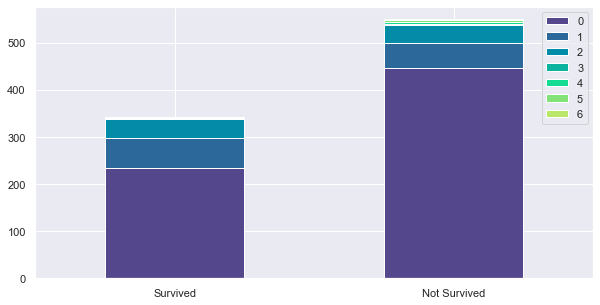

In [184]:
bar_chart_plot('Parch')

**Observation**   
A passenger who boarded alone more likely not survived.

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64

Not Survived
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


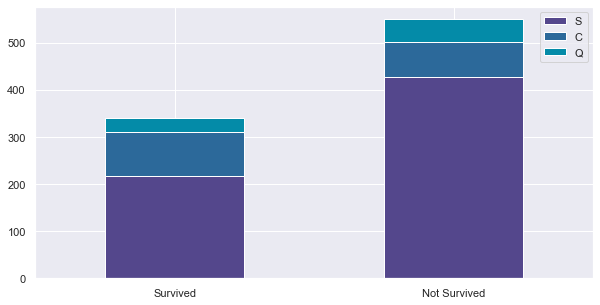

In [185]:
bar_chart_plot('Embarked')

**Observation**   
A passenger who embarked from C slightly more likely survived.  
A passenger who embarked from S and Q more likely not survived.  

### Correlation Analysis - Heatmap

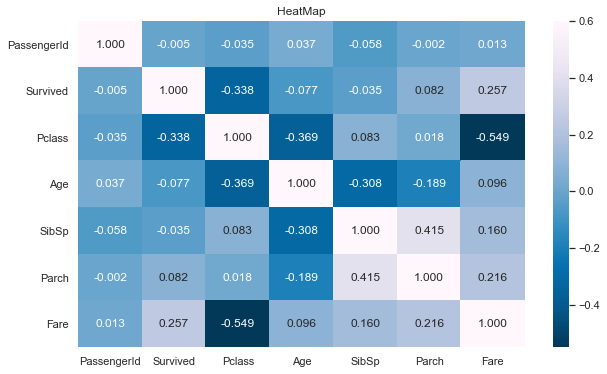

In [186]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),vmax=.6,fmt='.3f', annot = True,cmap = 'PuBu_r')
plt.title("HeatMap")
plt.show()

**Observation**  
No high correlation among target and other features.  
Pclass and Fare correlated. 

### Feature Engineering 

In [187]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [188]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [189]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [190]:
title_replacing = {"Mr": 0, "Miss": 1, "Mrs": 2,
                   "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Rev": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3,
                   "Master": 3, "Dr": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3 }

train['Title'] = train['Title'].replace(title_replacing)
test['Title'] = test['Title'].replace(title_replacing)

In [191]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [192]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [193]:
train.drop(columns ='Name', inplace=True)
test.drop(columns ='Name', inplace=True)

In [194]:
#Binaries Sex
sex_replacing = {'male':0,'female':1}
train['Sex'] = train['Sex'].replace(sex_replacing)
test['Sex'] = test['Sex'].replace(sex_replacing)

### Data Fixing

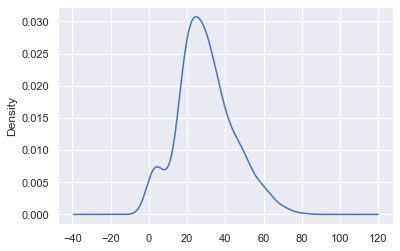

In [195]:
train['Age'].plot(kind = 'kde')
plt.show()

In [196]:
#Filling Age
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)
test["Age"].fillna(test.groupby('Title')['Age'].transform("median"), inplace= True)

In [197]:
#Filling Embarked
embarked_replacing = {'C':0,'Q':1,'S':2}

train['Embarked'] = train['Embarked'].replace(embarked_replacing)
test['Embarked'] = test['Embarked'].replace(embarked_replacing)

a = train['Embarked'].mode()
a

0    2.0
dtype: float64

In [198]:
train["Embarked"].fillna(2, inplace= True)

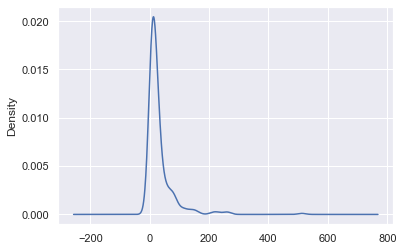

In [199]:
train['Fare'].plot(kind = 'kde')
plt.show()

In [200]:
#Filling Fare
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform("median"), inplace= True)

In [201]:
#Filling Cabin
train['Cabin'] =  train['Cabin'].str[:1]
test['Cabin'] =  train['Cabin'].str[:1]

In [202]:
train['Cabin'].unique(),test['Cabin'].unique()

(array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object))

In [203]:
cabin_replacing = {'C':0, 'E':1, 'G':2, 'D':3, 'A':4, 'B':5, 'F':6, 'T':7 }

train['Cabin'] = train['Cabin'].replace(cabin_replacing)
test['Cabin'] = test['Cabin'].replace(cabin_replacing)

In [204]:
train["Cabin"].fillna(train.groupby(["Pclass"])["Cabin"].transform("median"), inplace= True)
test["Cabin"].fillna(test.groupby(["Pclass"])['Cabin'].transform("median"), inplace= True)

In [205]:
train.isna().sum().sum(),test.isna().sum().sum()

(0, 0)

In [206]:
train = train.drop(columns=['Ticket'])
test = test.drop(columns=['Ticket'])
train = train.drop(columns=['PassengerId'])

In [207]:
train['Cabin'] = train['Cabin'].astype('int')
test['Cabin'] =  train['Cabin'].astype('int')

train['Embarked'] = train['Embarked'].astype('int')
test['Embarked'] =  train['Embarked'].astype('int')

In [208]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2,2,0
1,1,1,1,38.0,1,0,71.2833,0,0,2
2,1,3,1,26.0,0,0,7.9250,2,2,1
3,1,1,1,35.0,1,0,53.1000,0,2,2
4,0,3,0,35.0,0,0,8.0500,2,2,0


In [209]:
train.groupby('Cabin').median()['Fare']

Cabin
0    83.47500
1    45.18125
2     8.05000
3    52.00000
4    18.75000
5    80.00000
6    13.00000
7    35.50000
Name: Fare, dtype: float64

In [210]:
train.to_csv("titanic.csv")

In [211]:
test.to_csv("titanic_test.csv")

### Modelling  

In [212]:
train = train.drop(columns=['SibSp','Parch'])
test = test.drop(columns=['SibSp','Parch'])

In [222]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked
0,892,3,0,34.5,7.8292,2,2
1,893,3,1,47.0,7.0000,0,0
2,894,2,0,62.0,9.6875,2,2
3,895,3,0,27.0,8.6625,0,2
4,896,3,1,22.0,12.2875,2,2


In [223]:
Xtest = test.drop(columns='PassengerId')

In [215]:
target = train['Survived']
train_data = train.drop(columns='Survived')

In [216]:
X = train_data.copy()
y = target.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state = 3)

param = {'n_estimators': sp_randint(50,200),
         'max_features': sp_randint(1,14),
         'max_depth': sp_randint(2,10),
         'min_samples_leaf': sp_randint(1,20),
         'min_samples_split': sp_randint(2,20)}

rsearch = RandomizedSearchCV(rf ,  param_distributions = param, scoring = 'roc_auc', n_iter = 100,
                             cv = 3, random_state=3 , n_jobs = -1, return_train_score = True)

rsearch.fit(X,y)

In [ ]:
rf = RandomForestClassifier(**rsearch.best_params_, random_state = 2)
rf.fit(X,y)

In [231]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

lgbc = lgb.LGBMClassifier(random_state = 3)

params = {'n_estimators' :sp_randint(50,200),
          'max_depth': sp_randint(1,10),
          'learning_rate': sp_uniform(0,0.5)}

rsearch_lgbm = RandomizedSearchCV(lgbc, param_distributions = params, cv = 10, n_iter=100, n_jobs = -1, 
                                  return_train_score = True, scoring = 'roc_auc', random_state = 3)

rsearch_lgbm.fit(X,y)
rsearch_lgbm.best_params_

{'learning_rate': 0.41401105818179357, 'max_depth': 2, 'n_estimators': 59}

In [232]:
lgbc = lgb.LGBMClassifier(**rsearch_lgbm.best_params_,random_state = 3)
lgbc.fit(X,y)

LGBMClassifier(learning_rate=0.41401105818179357, max_depth=2, n_estimators=59,
               random_state=3)

In [242]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X,y)

AdaBoostClassifier()

In [250]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [254]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators = [('lgbc',lgbc),('rf',rf),('ada',ada),('lr',lr)], voting = 'hard')
clf.fit(X,y)

VotingClassifier(estimators=[('lgbc',
                              LGBMClassifier(learning_rate=0.41401105818179357,
                                             max_depth=2, n_estimators=59,
                                             random_state=3)),
                             ('rf',
                              RandomForestClassifier(max_depth=7,
                                                     max_features=3,
                                                     min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=198,
                                                     random_state=2)),
                             ('ada', AdaBoostClassifier()),
                             ('lr', LogisticRegression())])

In [255]:
y_pred = clf.predict(Xtest)
y_prob = clf.predict_proba(Xtest)[:,1]

In [244]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_prob)

0.9999999999999999

******************************